In [1]:
from HistoLib import generator
from HistoLib import utils
from HistoLib import models
from HistoLib import traintest
from HistoLib import gradcam

In [2]:
utils.dataset_description()

Total images 692
Total patients 45


20x  40x  Total
aca_bd   58   46    104
aca_md   44   46     90
aca_pd   45   42     87
nor      85   66    151
scc_bd   50   49     99
scc_md   30   36     66
scc_pd   48   47     95
Total   360  332    692

## Get images

In [3]:
resolution = '20x'      # One of ['20x', '40x']

train_generator, val_generator, test_generator, class_names = generator.get_patient_generators(resolution, batch_size=8, 
                                                                                               debug=True,                 # Shows the number of images being used.
                                                                                               reproducible=True           # Use the splits from the original paper.
                                                                                              )

Images (300x400)      Training: 263 | Validation: 49  | Test: 48  | Total: 360
Patients              Training: 29  | Validation: 5   | Test: 4   | Total: 38 
Class aca    (id 0)   Training: 109 | Validation: 20  | Test: 18  | Total: 147
Class nor    (id 1)   Training: 52  | Validation: 14  | Test: 19  | Total: 85 
Class scc    (id 2)   Training: 102 | Validation: 15  | Test: 11  | Total: 128


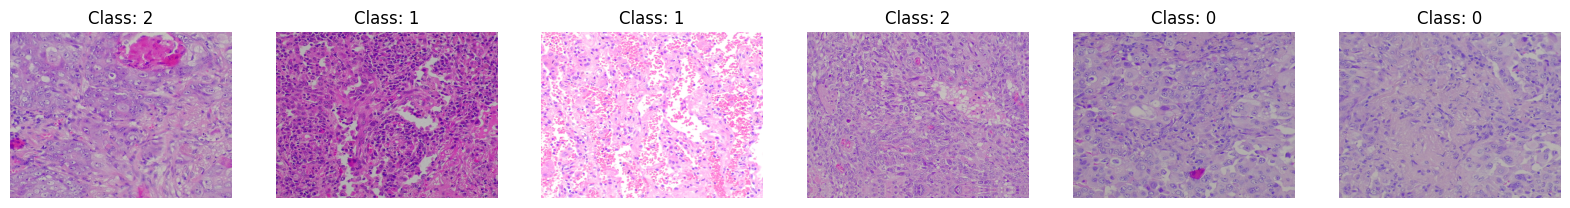

In [4]:
train_generator.show_generator()

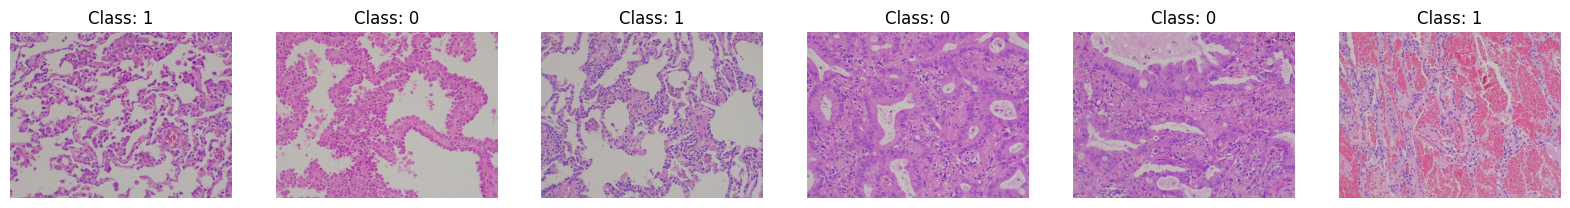

In [5]:
val_generator.show_generator()

## Train Model

In [7]:
model, model_name = models.get_model(train_generator, 'ResNet50')

In [8]:
class_weights = utils.compute_weights(train_generator)
log_dir = traintest.get_logdir(model_name)

model = traintest.compile_model(model, num_classes=len(class_weights), init_lr=1e-5)
history = traintest.train_model(model, train_generator, val_generator, class_weights, log_dir)

## Evaluate using test data

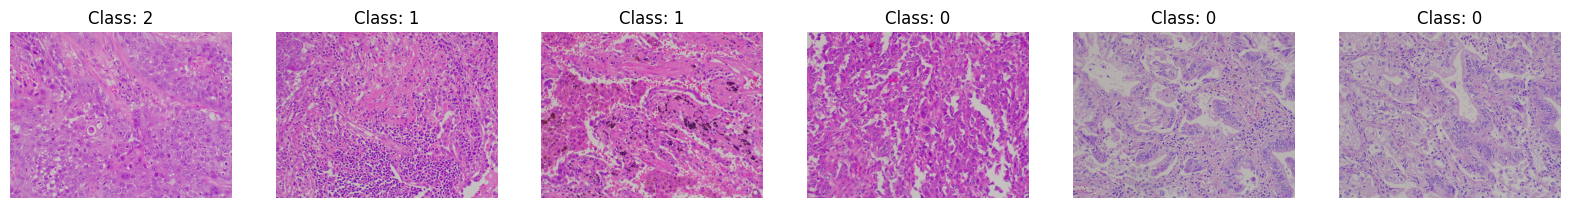

In [9]:
test_generator.show_generator()

Test AUC: 0.98
Test Accuracy: 0.90
Test Precision: 0.92
Test Recall: 0.87


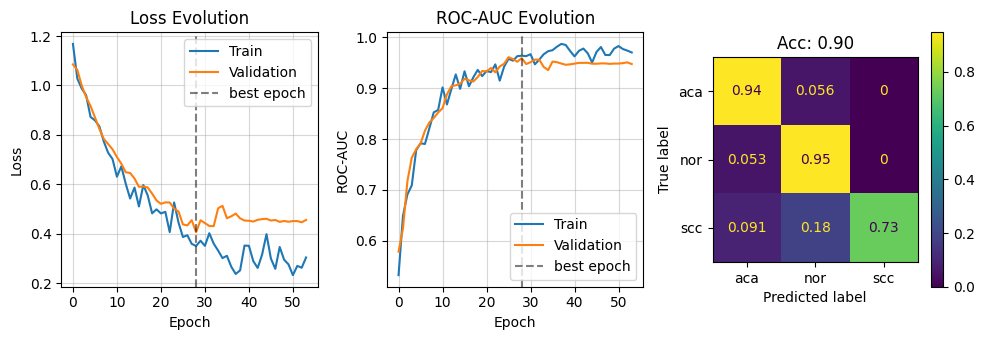

In [10]:
traintest.metrics_and_test(history, model, test_generator, class_names)

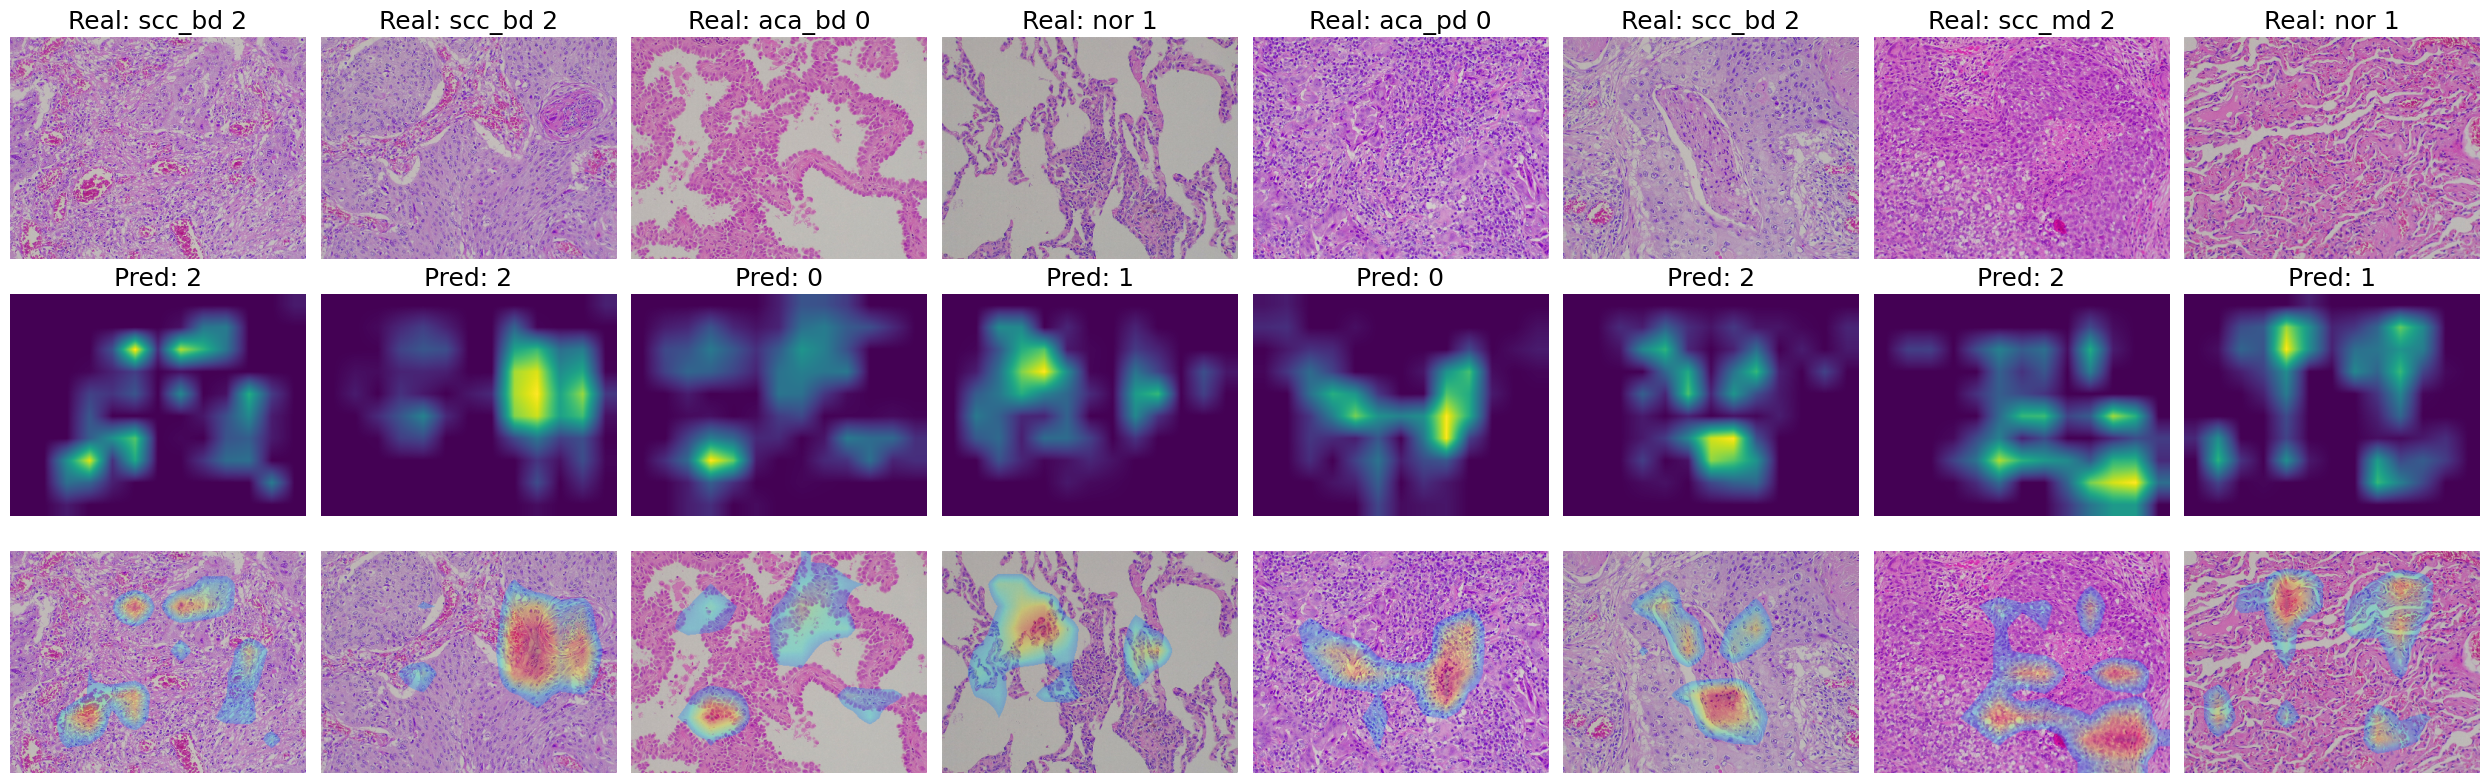

In [11]:
gradcam.generate_gradcam_samples(model, val_generator)